In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
arr = np.array

In [2]:
locations = pd.read_csv("suggested_locations.csv", dtype={'id': 'category'})
comments = pd.read_csv("suggested_comments.csv", dtype={'id': 'category'})

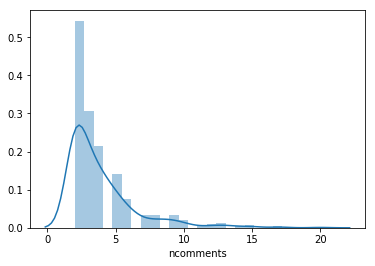

In [67]:
ncomments = comments.groupby('id').id.count().rename('ncomments') + 1
sns.distplot(ncomments)

In [195]:
from scipy.spatial.distance import cdist
X = Y = locations[['lat', 'lng']]
dist = cdist(X, Y)
exp_cdf = lambda x, l=1000: 1 - np.e ** (-l*x)
weights = 1 - exp_cdf(dist)
sns.distplot(dist[np.triu_indices(1000)])

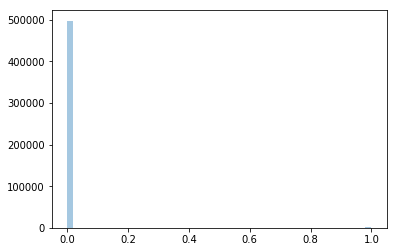

In [201]:
sns.distplot(weights[np.triu_indices(1000)], kde=False)

In [198]:
newdf = locations.join(ncomments, on='id')
comments_by_station = comments.groupby('id').comment.apply(list).rename('comments')
newdf = newdf.join(comments_by_station, on='id')
newdf.ncomments = newdf.ncomments.fillna(1)
newdf['popularity'] = [np.sum(weights[i] * newdf.ncomments) for i, _ in newdf.iterrows()]
# np.sum(weights * np.tile(newdf.ncomments, (len(newdf.ncomments), 1)).T, axis=1)

In [285]:
from itertools import chain
newnew = newdf.groupby(['lat', 'lng']).
                agg({
                    'id': 'count',
                    'ncomments': 'sum',
                    'comment': lambda x: ''.join(x.dropna()),
                    'comments': lambda x: list(chain(*x.dropna()))
                }).reset_index().rename(columns={'id': 'nstations'})
newnew.comments = newnew.apply(lambda r: r.comments + [r.comment], axis=1)

In [288]:
import requests
import urllib.parse
def request(text):
    try:
        annotations = requests.get(f"https://api.dandelion.eu/datatxt/nex/v1/?lang=en&text={urllib.parse.quote(text[:2500])}&include=image%2Calternate_labels%2Ctypes%2Cabstract%2Ccategories%2Clod&token=7a037e59dae14528905d167a365da3a5").json()['annotations']
        labels = [a['label'] for a in annotations]
        print(labels)
        return labels
    except:
        return []

newnew['topics'] = newnew.apply(lambda r: request(' '.join([c for c in r.comment if c != 'I Agree'])), axis=1)


/usr/local/Cellar/ipython/7.1.1/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [ ]:
newnew[['lat', 'lng' , 'comments', 'ncomments']].
    rename(columns={'ncomments':'weight'}).
    to_json('latlng.json', orient='records')

In [245]:
# newdf[['lat', 'lng' , 'comment', 'comments', 'popularity']].rename(columns={'popularity':'weight'}).to_json('latlng.json', orient='records')
# dfsorted[['lat', 'lng' , 'popularity']].rename(columns={'popularity':'weight'}).to_json('latlng.json', orient='records')

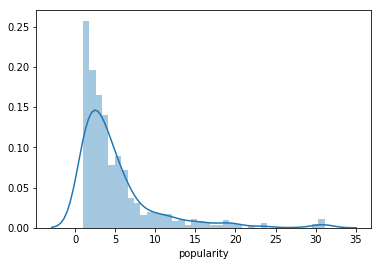

In [200]:
sns.distplot(newdf.popularity)

In [193]:
dfsorted = newdf.sort_values('popularity', ascending=False)
dfsorted.head(10)

,id,lat,lng,comment,vote,ncomments,comments,popularity
561,239099,34.024067,-118.403521,NaN,I like this location,3.0,"[I Agree, I Disagree, residential only, should...",221.452769
562,239100,34.022965,-118.405538,NaN,I like this location,6.0,"[I Agree, I Agree, I Agree, I Agree, I Agree]",220.373514
743,247553,34.022075,-118.401890,Such a dense area it would be great for people...,I like this location,2.0,[I Agree],220.283964
719,245634,34.020724,-118.403950,General comment for this area: a bike share st...,I like this location,1.0,NaN,220.107883
303,237315,34.020724,-118.403950,NaN,I like this location,5.0,[Perfect for connection from bus stops to both...,220.107883
223,237175,34.020724,-118.403950,NaN,I like this location,15.0,"[I Agree, I Agree, I Agree, I Agree, I Agree, ...",220.107883
565,239103,34.022965,-118.400431,NaN,I like this location,5.0,"[I Agree, Right by the school., I Agree, I Agree]",219.940542
929,251074,34.021720,-118.401890,High Ridership Bus Stop - MOTOR AVE/VENICE BLVD,I like this location,1.0,NaN,219.540089
930,251075,34.020546,-118.403864,High Ridership Bus Stop - MOTOR AVE/VENICE BLVD\n,I like this location,1.0,NaN,219.103725
960,251107,34.023249,-118.398714,Southern California Hospital\n,I like this location,2.0,[I Agree RNA San Pedro CicLAvia vinyl],217.773046


In [21]:
text = ' '.join(comments.comment).replace('I Agree', '').replace('"', "").lower()

In [22]:
# import nltk
# words = ' '.join([w for w in nltk.word_tokenize(text) if w.isalpha()])
# words[:5]

In [23]:
len(comments.comment)

1804

In [ ]:
import requests
import urllib.parse
entities = []
for i in range(0, len(text), 2500):
    try:
        entities += requests.get(f"https://api.dandelion.eu/datatxt/nex/v1/?lang=en&text={urllib.parse.quote(text[i:i+2500])}&include=image%2Calternate_labels%2Ctypes%2Cabstract%2Ccategories%2Clod&token=7a037e59dae14528905d167a365da3a5").json()['annotations']
    except:
        pass


In [ ]:
all_catagories = ' '.join([' '.join([p.strip().replace(' ', '~') for p in e['alternateLabels']]) for e in entities])

In [ ]:
urls = set()
for ent in entities:
    try:
        if 'image' in ent:
            if 'thumbnail' in ent['image']:
                urls.add(ent['image']['thumbnail'].decode('ascii'))
            elif 'full' in ent['image']:
                urls.add(ent['image']['full'].decode('ascii'))
    except UnicodeDecodeError:
        print('problem')
        pass

In [ ]:
import urllib
from matplotlib import pyplot as plt
from math import ceil
nimages = len(urls)
f, axarr = plt.subplots(ceil(nimages / 10), 10, figsize=(15,15))
plt.subplots_adjust(wspace=0, hspace=0)
row = 0
i = 0
col = 0
for url in urls:
    axarr[row, col].set_axis_off()
    # fetch the url as a file type object, then read the image
    f = urllib.request.urlopen(url)
    a = plt.imread(f, format='jpg')
    col = i % 10
    # plot on relevant subplot
    axarr[row,col].imshow(a)
    if col == 9:
        row += 1
    i += 1

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
word_counts = count_vectorizer.fit_transform(train_reviews)
word_counts.shape

In [ ]:
dist1 = lambda u, v: np.sum(np.abs(u - v))
dist2 = lambda u, v: np.sqrt(np.dot(u, v))
sim = lambda u, v, l=1: l*np.e ** (-l*dist2(u, v))
# words is matrix where rows are stations, columns are words and entries are wordcounts for that station, word
wordcounts = 
distances = sim(s[['lat', 'lng']], locations[['lat', 'lng']])
aggregate = lambda s: np.sum(distances * wordcounts) / (np.sum(distances) * wordcounts.shape[0])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape